From this dataset, we are interested primarily in learning which opening wins the most for each colour. Below is our analysis to help us determine which opening is best.

From our EDA, we came up with a few new questions: is there a link between the skill rating of the match and the number of turns in a match? Is it merely coincidence that the higher skiled player is usually white? How many turns are in the average game?

<AxesSubplot:>

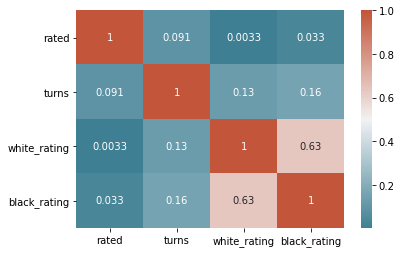

In [2]:
import pandas as pd
import seaborn as sns
from scripts import project_functions

df=project_functions.load_and_process('../data/raw/games.csv');
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True) )

Since the first guide link from the lab page reccommended drawing a heatmap of the correlations between numeric variables, that's how we both started our EDA's. This heatmap doesn't give us a whole lot, but it does show that the skill ratings of both players in a match are usually close. We assume that this is because the matches are arranged with some kind of skill based matchmaking.

<AxesSubplot:ylabel='Frequency'>

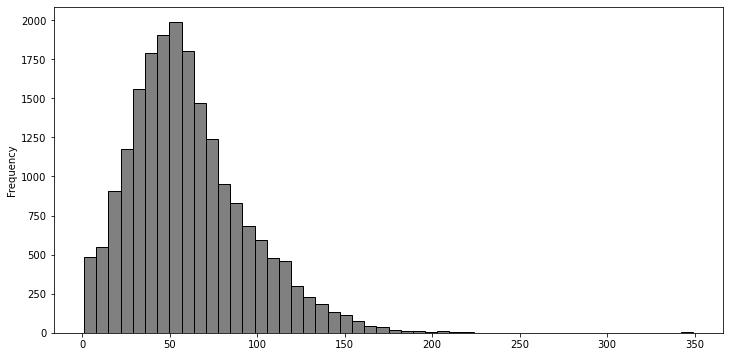

In [3]:
df['turns'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

This plot helps answer our question about the average duration of matches: they seem to last about 50 turns on average, follwoing a somewhat normal distribution.